<a href="https://colab.research.google.com/github/Hansulich/park/blob/main/week13_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Golf Playing Dataset ===
    ID   Weather Temperature Humidity    Wind Golf
0    1     Sunny         Hot     High    Weak    N
1    2     Sunny         Hot     High  Strong    N
2    3  Overcast         Hot     High    Weak    Y
3    4     Rainy        Mild     High    Weak    Y
4    5     Rainy        Cool   Normal    Weak    Y
5    6     Rainy        Cool   Normal  Strong    N
6    7  Overcast        Cool   Normal  Strong    Y
7    8     Sunny        Mild     High    Weak    N
8    9     Sunny        Cool   Normal    Weak    Y
9   10     Rainy        Mild   Normal    Weak    Y
10  11     Sunny        Mild   Normal  Strong    Y
11  12  Overcast        Mild     High  Strong    Y
12  13  Overcast         Hot   Normal    Weak    Y
13  14     Rainy        Mild     High  Strong    N

Total data: 14 samples
Y: 9 samples, N: 5 samples

=== Step 1: Total Dataset Entropy ===
I(D) = -(9/14)×log₂(9/14) - (5/14)×log₂(5/14) = 0.940

=== Step 2: Root Node Selection - Information Gain for Each A

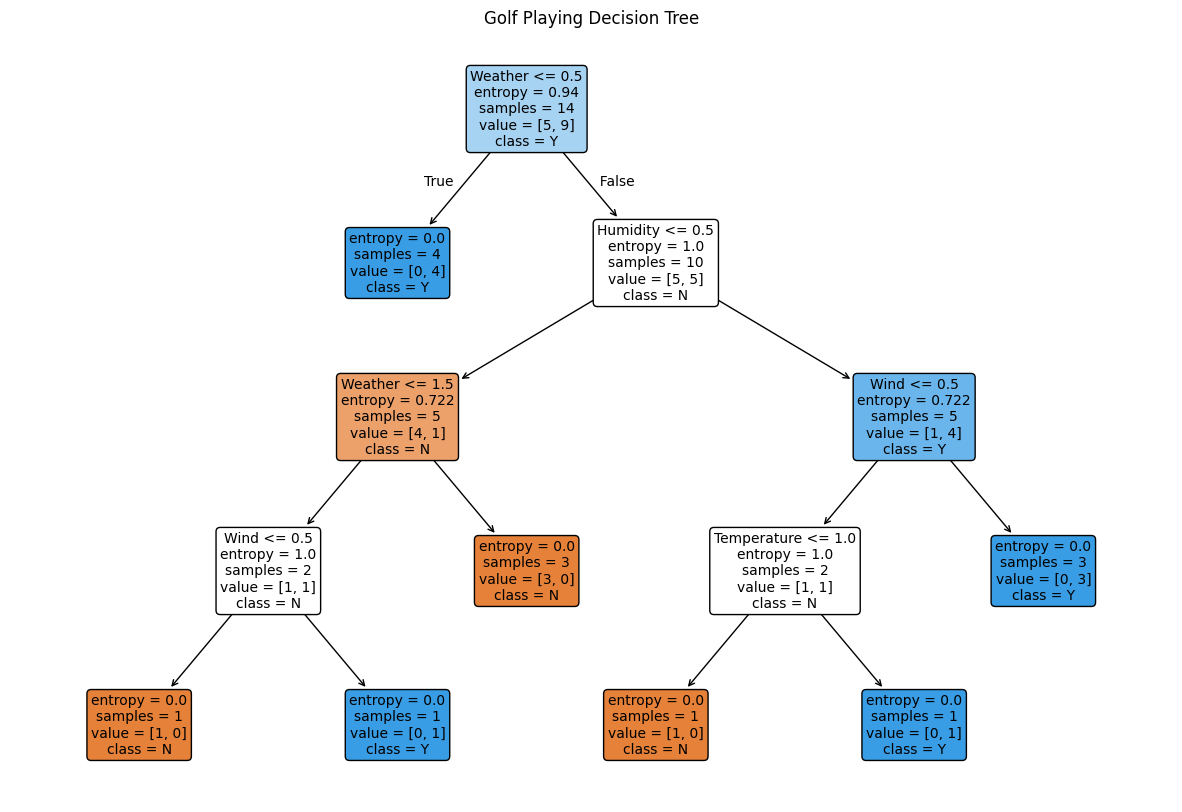


=== Encoding Mapping Information ===
Weather: {'Overcast': np.int64(0), 'Rainy': np.int64(1), 'Sunny': np.int64(2)}
Temperature: {'Cool': np.int64(0), 'Hot': np.int64(1), 'Mild': np.int64(2)}
Humidity: {'High': np.int64(0), 'Normal': np.int64(1)}
Wind: {'Strong': np.int64(0), 'Weak': np.int64(1)}

=== Final Result Summary ===
1. Root node: Weather (Information gain: 0.247)
2. Sunny → Humidity (Information gain: 0.971)
3. Rainy → Wind (Information gain: 0.971)
4. Overcast → Stop splitting (All Y)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import math

# Golf data from PDF (14 samples)
golf_data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'Golf': ['N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N']
}

df = pd.DataFrame(golf_data)
print("=== Golf Playing Dataset ===")
print(df)
print(f"\nTotal data: {len(df)} samples")
print(f"Y: {sum(df['Golf'] == 'Y')} samples, N: {sum(df['Golf'] == 'N')} samples")

# Entropy calculation function
def calculate_entropy(data):
    """Calculate entropy"""
    if len(data) == 0:
        return 0

    # Count each class
    counts = data.value_counts()
    total = len(data)

    entropy = 0
    for count in counts:
        if count > 0:
            p = count / total
            entropy -= p * math.log2(p)

    return entropy

# Information gain calculation function
def calculate_information_gain(df, target_col, feature_col):
    """Calculate information gain"""
    # Total entropy
    total_entropy = calculate_entropy(df[target_col])

    # Split by each attribute value
    feature_values = df[feature_col].unique()
    weighted_entropy = 0

    print(f"\n--- {feature_col} Attribute Split ---")
    for value in feature_values:
        subset = df[df[feature_col] == value]
        subset_target = subset[target_col]

        weight = len(subset) / len(df)
        subset_entropy = calculate_entropy(subset_target)
        weighted_entropy += weight * subset_entropy

        y_count = sum(subset_target == 'Y')
        n_count = sum(subset_target == 'N')
        print(f"{feature_col}={value}: {subset['ID'].tolist()}")
        print(f"  Y: {y_count}, N: {n_count}, Entropy: {subset_entropy:.3f}")

    information_gain = total_entropy - weighted_entropy
    print(f"Information Gain G(D, {feature_col}) = {total_entropy:.3f} - {weighted_entropy:.3f} = {information_gain:.3f}")

    return information_gain, total_entropy, weighted_entropy

# Step 1: Calculate entropy of entire dataset
print("\n=== Step 1: Total Dataset Entropy ===")
total_entropy = calculate_entropy(df['Golf'])
print(f"I(D) = -(9/14)×log₂(9/14) - (5/14)×log₂(5/14) = {total_entropy:.3f}")

# Step 2: Calculate information gain for each attribute (root node selection)
print("\n=== Step 2: Root Node Selection - Information Gain for Each Attribute ===")
attributes = ['Weather', 'Temperature', 'Humidity', 'Wind']
gains = {}

for attr in attributes:
    gain, _, _ = calculate_information_gain(df, 'Golf', attr)
    gains[attr] = gain

print("\n--- Information Gain Comparison ---")
for attr, gain in gains.items():
    print(f"G(D, {attr}) = {gain:.3f}")

# Select attribute with highest information gain
best_attribute = max(gains, key=gains.get)
print(f"\nConclusion: {best_attribute} has the highest information gain ({gains[best_attribute]:.3f}), selected as root node")

# Step 3: Create intermediate node - Sunny node
print("\n=== Step 3: Intermediate Node - Weather=Sunny Split ===")
sunny_data = df[df['Weather'] == 'Sunny']
print(f"Sunny data: {sunny_data['ID'].tolist()}")
print(f"Y: {sum(sunny_data['Golf'] == 'Y')}, N: {sum(sunny_data['Golf'] == 'N')}")

sunny_entropy = calculate_entropy(sunny_data['Golf'])
print(f"Sunny data entropy: {sunny_entropy:.3f}")

# Information gain for sub-attributes of Sunny node
sunny_gains = {}
remaining_attrs = ['Temperature', 'Humidity', 'Wind']

for attr in remaining_attrs:
    gain, _, _ = calculate_information_gain(sunny_data, 'Golf', attr)
    sunny_gains[attr] = gain

print("\n--- Sunny Node Information Gain Comparison ---")
for attr, gain in sunny_gains.items():
    print(f"G(D_Sunny, {attr}) = {gain:.3f}")

best_sunny_attr = max(sunny_gains, key=sunny_gains.get)
print(f"Conclusion: {best_sunny_attr} has the highest information gain")

# Step 4: Create intermediate node - Rainy node
print("\n=== Step 4: Intermediate Node - Weather=Rainy Split ===")
rainy_data = df[df['Weather'] == 'Rainy']
print(f"Rainy data: {rainy_data['ID'].tolist()}")
print(f"Y: {sum(rainy_data['Golf'] == 'Y')}, N: {sum(rainy_data['Golf'] == 'N')}")

rainy_entropy = calculate_entropy(rainy_data['Golf'])
print(f"Rainy data entropy: {rainy_entropy:.3f}")

# Information gain for sub-attributes of Rainy node
rainy_gains = {}

for attr in remaining_attrs:
    gain, _, _ = calculate_information_gain(rainy_data, 'Golf', attr)
    rainy_gains[attr] = gain

print("\n--- Rainy Node Information Gain Comparison ---")
for attr, gain in rainy_gains.items():
    print(f"G(D_Rainy, {attr}) = {gain:.3f}")

best_rainy_attr = max(rainy_gains, key=rainy_gains.get)
print(f"Conclusion: {best_rainy_attr} has the highest information gain")

# Check Overcast node
print("\n=== Overcast Node Check ===")
cloudy_data = df[df['Weather'] == 'Overcast']
print(f"Overcast data: {cloudy_data['ID'].tolist()}")
print(f"Y: {sum(cloudy_data['Golf'] == 'Y')}, N: {sum(cloudy_data['Golf'] == 'N')}")
cloudy_entropy = calculate_entropy(cloudy_data['Golf'])
print(f"Overcast data entropy: {cloudy_entropy:.3f} (All Y, stop splitting)")

# Data encoding for visualization
print("\n=== Decision Tree Visualization ===")

# Encode categorical data to numbers
from sklearn.preprocessing import LabelEncoder

# Feature encoding
le_dict = {}
X_encoded = df[['Weather', 'Temperature', 'Humidity', 'Wind']].copy()

for col in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    le_dict[col] = le

# Target encoding
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(df['Golf'])

# Train decision tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_encoded, y_encoded)

# Visualize tree
plt.figure(figsize=(15, 10))
plot_tree(clf,
          feature_names=['Weather', 'Temperature', 'Humidity', 'Wind'],
          class_names=['N', 'Y'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Golf Playing Decision Tree')
plt.show()

# Output encoding mapping information
print("\n=== Encoding Mapping Information ===")
for col, le in le_dict.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"{col}: {mapping}")

print("\n=== Final Result Summary ===")
print(f"1. Root node: {best_attribute} (Information gain: {gains[best_attribute]:.3f})")
print(f"2. Sunny → {best_sunny_attr} (Information gain: {sunny_gains[best_sunny_attr]:.3f})")
print(f"3. Rainy → {best_rainy_attr} (Information gain: {rainy_gains[best_rainy_attr]:.3f})")
print(f"4. Overcast → Stop splitting (All Y)")

=== Drug Classification Dataset ===
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
5   22   F  NORMAL        HIGH    8.607  drugX
6   49   F  NORMAL        HIGH   16.275  drugY
7   41   M     LOW        HIGH   11.037  drugC
8   60   M  NORMAL        HIGH   15.171  drugY
9   43   M     LOW      NORMAL   19.368  drugY

Dataset shape: (200, 6)

Target distribution:
Drug
drugA    23
drugB    16
drugC    16
drugX    54
drugY    91
Name: count, dtype: int64

Feature information:
Age: int64
  Range: 15.00 - 74.00
Sex: object
  Unique values: ['F' 'M']
BP: object
  Unique values: ['HIGH' 'LOW' 'NORMAL']
Cholesterol: object
  Unique values: ['HIGH' 'NORMAL']
Na_to_K: float64
  Range: 6.27 - 38.25

=== Step 1: Total Dataset Entropy ===
Total entropy I(D) = 1.969

=

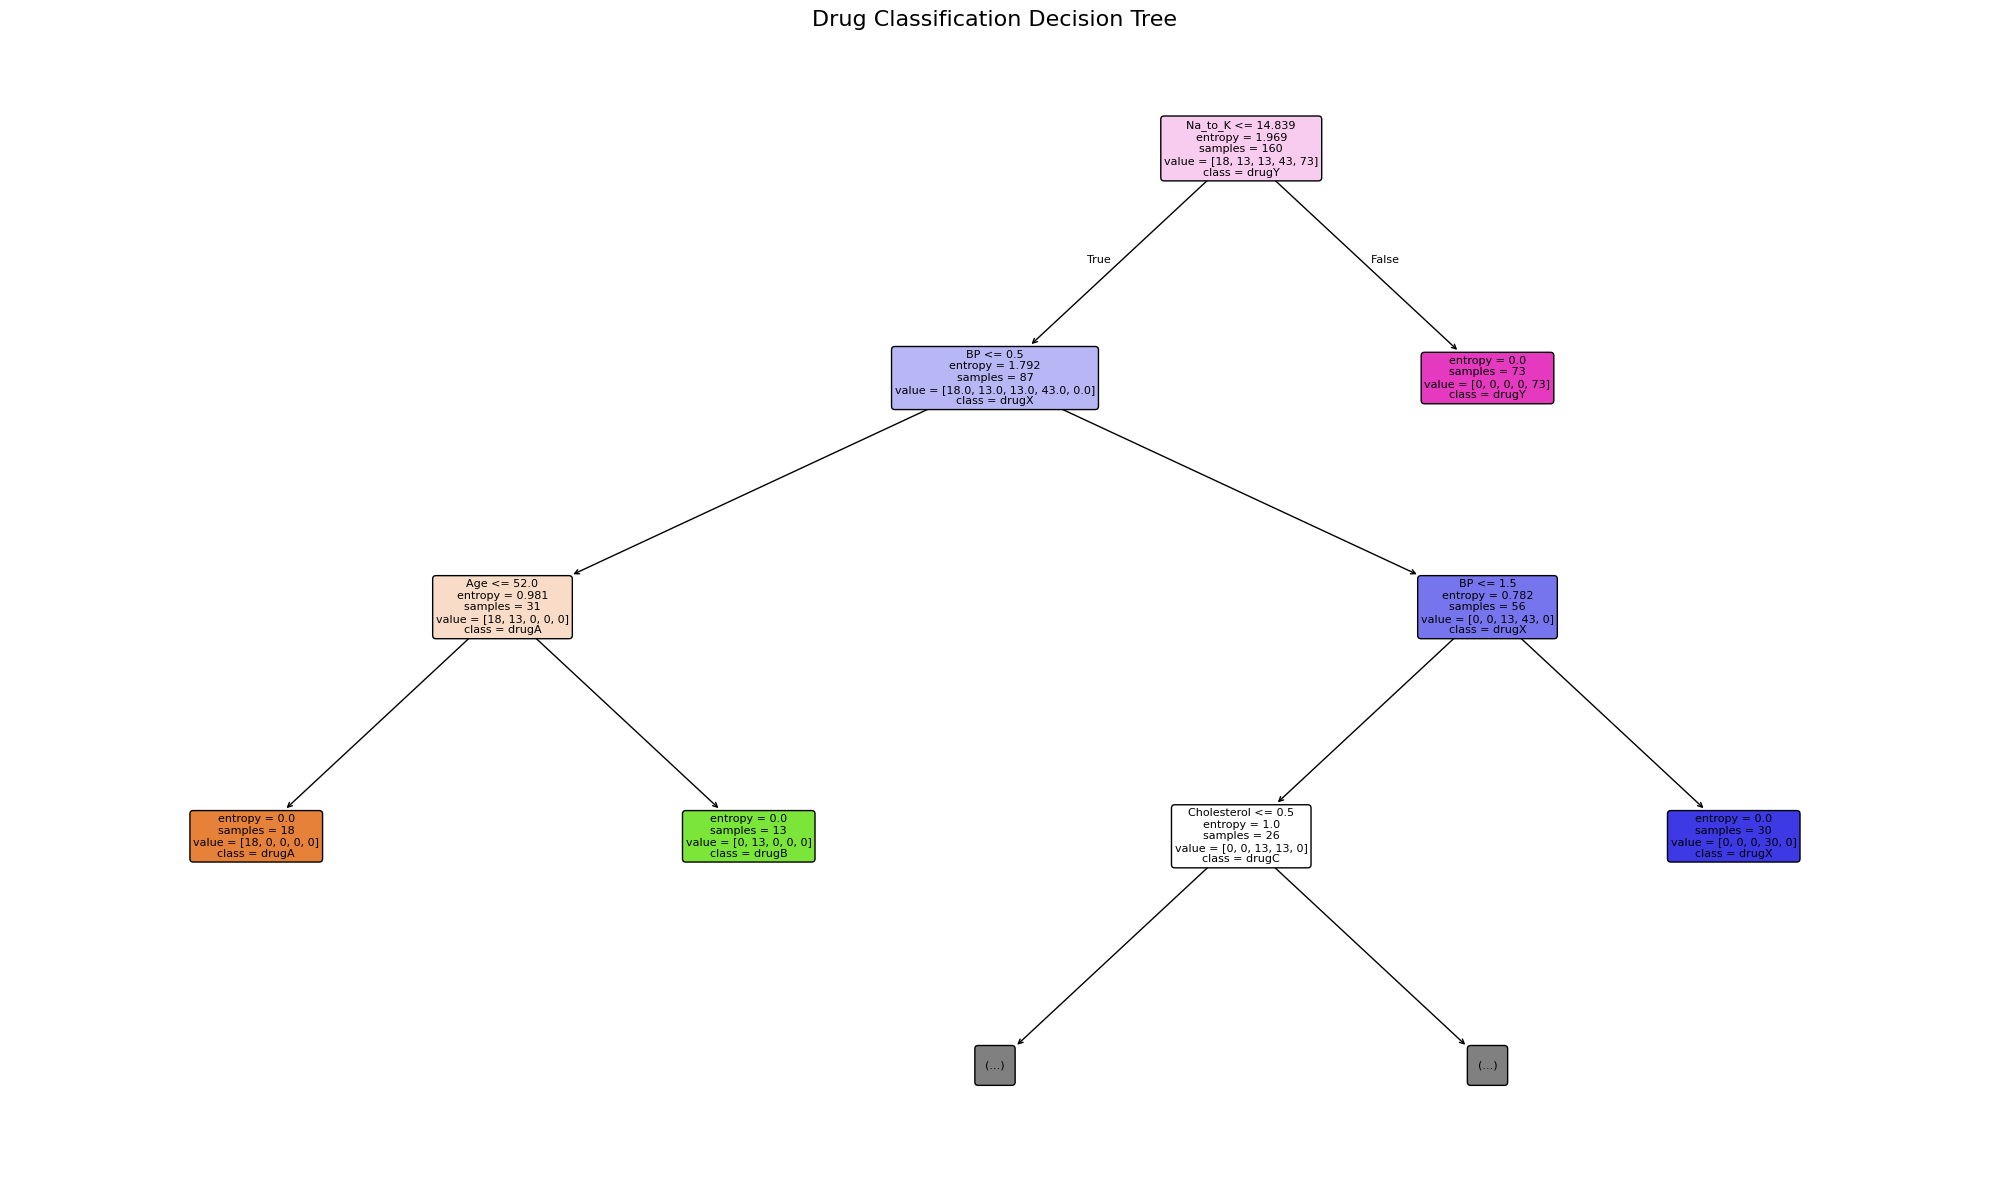


=== Classification Report ===
              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.97      0.93      0.94        40
weighted avg       0.98      0.97      0.97        40


=== Confusion Matrix ===
Predicted ->
Actual ↓
              Pred_drugA  Pred_drugB  Pred_drugC  Pred_drugX  Pred_drugY
Actual_drugA           5           0           0           0           0
Actual_drugB           1           2           0           0           0
Actual_drugC           0           0           3           0           0
Actual_drugX           0           0           0          11           0
Actual_drugY           0           0           0           0       

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import math

drug_data = {
    'Age': [23,47,47,28,61,22,49,41,60,43,47,34,43,74,50,16,69,43,23,32],
    'Sex': ['F','M','M','F','F','F','F','M','M','M','F','F','M','F','F','F','M','M','M','F'],
    'BP': ['HIGH','LOW','LOW','NORMAL','LOW','NORMAL','NORMAL','LOW','NORMAL','LOW','LOW','HIGH','LOW','LOW','NORMAL','HIGH','LOW','HIGH','LOW','HIGH'],
    'Cholesterol': ['HIGH','HIGH','HIGH','HIGH','HIGH','HIGH','HIGH','HIGH','HIGH','NORMAL','HIGH','NORMAL','HIGH','HIGH','HIGH','NORMAL','NORMAL','HIGH','HIGH','NORMAL'],
    'Na_to_K': [25.355,13.093,10.114,7.798,18.043,8.607,16.275,11.037,15.171,19.368,11.767,19.199,15.376,20.942,12.703,15.516,11.455,13.972,7.298,25.974],
    'Drug': ['drugY','drugC','drugC','drugX','drugY','drugX','drugY','drugC','drugY','drugY','drugC','drugY','drugY','drugY','drugX','drugY','drugX','drugA','drugC','drugY']
}

df = pd.read_csv('/drug200.csv')

print("=== Drug Classification Dataset ===")
print(df.head(10))
print(f"\nDataset shape: {df.shape}")
print(f"\nTarget distribution:")
print(df['Drug'].value_counts().sort_index())

print(f"\nFeature information:")
for col in df.columns[:-1]:  # Exclude target column
    print(f"{col}: {df[col].dtype}")
    if df[col].dtype == 'object':
        print(f"  Unique values: {df[col].unique()}")
    else:
        print(f"  Range: {df[col].min():.2f} - {df[col].max():.2f}")

# Entropy calculation function
def calculate_entropy(data):
    """Calculate entropy"""
    if len(data) == 0:
        return 0

    counts = data.value_counts()
    total = len(data)

    entropy = 0
    for count in counts:
        if count > 0:
            p = count / total
            entropy -= p * math.log2(p)

    return entropy

# Information gain calculation function
def calculate_information_gain(df, target_col, feature_col, bins=None):
    """Calculate information gain"""
    # Handle continuous variables by binning
    if df[feature_col].dtype in ['int64', 'float64'] and bins:
        feature_data = pd.cut(df[feature_col], bins=bins, labels=[f'Bin_{i}' for i in range(bins)])
    else:
        feature_data = df[feature_col]

    # Total entropy
    total_entropy = calculate_entropy(df[target_col])

    # Split by each attribute value
    feature_values = feature_data.unique()
    feature_values = feature_values[~pd.isna(feature_values)]  # Remove NaN values
    weighted_entropy = 0

    print(f"\n--- {feature_col} Attribute Split ---")
    for value in feature_values:
        if df[feature_col].dtype in ['int64', 'float64'] and bins:
            mask = feature_data == value
        else:
            mask = df[feature_col] == value

        subset = df[mask]
        subset_target = subset[target_col]

        if len(subset) == 0:
            continue

        weight = len(subset) / len(df)
        subset_entropy = calculate_entropy(subset_target)
        weighted_entropy += weight * subset_entropy

        drug_counts = subset_target.value_counts().to_dict()
        print(f"{feature_col}={value}: {len(subset)} samples")
        print(f"  Distribution: {drug_counts}, Entropy: {subset_entropy:.3f}")

    information_gain = total_entropy - weighted_entropy
    print(f"Information Gain G(D, {feature_col}) = {total_entropy:.3f} - {weighted_entropy:.3f} = {information_gain:.3f}")

    return information_gain

# Calculate total entropy
print("\n=== Step 1: Total Dataset Entropy ===")
total_entropy = calculate_entropy(df['Drug'])
print(f"Total entropy I(D) = {total_entropy:.3f}")

# Calculate information gain for each attribute
print("\n=== Step 2: Information Gain Analysis ===")
attributes = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
gains = {}

for attr in attributes:
    if attr == 'Age':
        # Bin age into groups for analysis
        gain = calculate_information_gain(df, 'Drug', attr, bins=3)
    elif attr == 'Na_to_K':
        # Bin Na_to_K ratio for analysis
        gain = calculate_information_gain(df, 'Drug', attr, bins=3)
    else:
        gain = calculate_information_gain(df, 'Drug', attr)
    gains[attr] = gain

print("\n--- Information Gain Comparison ---")
for attr, gain in gains.items():
    print(f"G(D, {attr}) = {gain:.3f}")

# Select best attribute
best_attribute = max(gains, key=gains.get)
print(f"\nBest root attribute: {best_attribute} (Information gain: {gains[best_attribute]:.3f})")

# Prepare data for sklearn Decision Tree
print("\n=== Decision Tree Training with Sklearn ===")

# Encode categorical variables
le_dict = {}
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].copy()

# Encode categorical features
categorical_features = ['Sex', 'BP', 'Cholesterol']
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

# Encode target
le_target = LabelEncoder()
y = le_target.fit_transform(df['Drug'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train decision tree
clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,  # Limit depth for better visualization
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")

# Feature importance
feature_importance = clf.feature_importances_
feature_names = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']

print("\n--- Feature Importance ---")
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance:.3f}")

# Visualize decision tree
plt.figure(figsize=(20, 12))
plot_tree(clf,
          feature_names=feature_names,
          class_names=le_target.classes_,
          filled=True,
          rounded=True,
          fontsize=8,
          max_depth=3)  # Limit display depth for readability
plt.title('Drug Classification Decision Tree', fontsize=16)
plt.tight_layout()
plt.show()

# Show classification report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Show confusion matrix
print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print("Predicted ->")
print("Actual ↓")
cm_df = pd.DataFrame(cm,
                     index=[f'Actual_{cls}' for cls in le_target.classes_],
                     columns=[f'Pred_{cls}' for cls in le_target.classes_])
print(cm_df)

# Display encoding mappings
print("\n=== Encoding Mappings ===")
for col, le in le_dict.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"{col}: {mapping}")

print(f"Target (Drug): {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")

# Decision rules extraction (simplified)
print("\n=== Sample Decision Rules ===")
print("Based on the trained decision tree, here are some example rules:")

# Get some sample predictions with explanations
sample_indices = [0, 5, 10] if len(X_test) > 10 else [0]
for idx in sample_indices:
    if idx < len(X_test):
        sample = X_test.iloc[idx:idx+1]
        prediction = clf.predict(sample)[0]
        predicted_drug = le_target.inverse_transform([prediction])[0]

        print(f"\nSample {idx+1}:")
        print(f"Age: {sample['Age'].values[0]}")
        print(f"Sex: {le_dict['Sex'].inverse_transform([sample['Sex'].values[0]])[0]}")
        print(f"BP: {le_dict['BP'].inverse_transform([sample['BP'].values[0]])[0]}")
        print(f"Cholesterol: {le_dict['Cholesterol'].inverse_transform([sample['Cholesterol'].values[0]])[0]}")
        print(f"Na_to_K: {sample['Na_to_K'].values[0]:.3f}")
        print(f"Predicted Drug: {predicted_drug}")

print("\n=== Analysis Complete ===")
print("The decision tree has been trained and visualized.")
print("You can modify the parameters (max_depth, min_samples_split, etc.) to get different tree structures.")